<a href="https://colab.research.google.com/github/Tasnim-Jahan/Thyroid-disease-prediction-using-Machine-Learning/blob/main/Thyroid_disease_prediction_using_Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [35]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')


Read data from csv

In [3]:
thyroid_df=pd.read_csv('/content/hypothyroid.csv')

In [4]:
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


Data Cleaning

In [5]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)

In [6]:
thyroid_df.replace('?',np.nan,inplace=True)

In [7]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [8]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [9]:
thyroid_df['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [10]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

In [11]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


Handle Missing Values

In [12]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [13]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())

In [14]:
thyroid_df.dropna(inplace=True)

In [15]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [16]:
thyroid_df = thyroid_df.drop(1364)

In [17]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

EDA

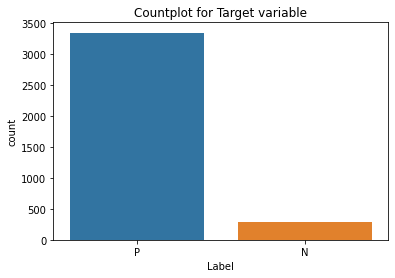

In [18]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [19]:
positive_df = thyroid_df[thyroid_df.Label=='P']

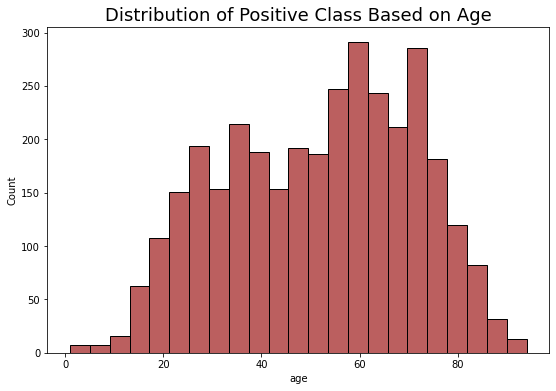

In [20]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='brown')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':18});

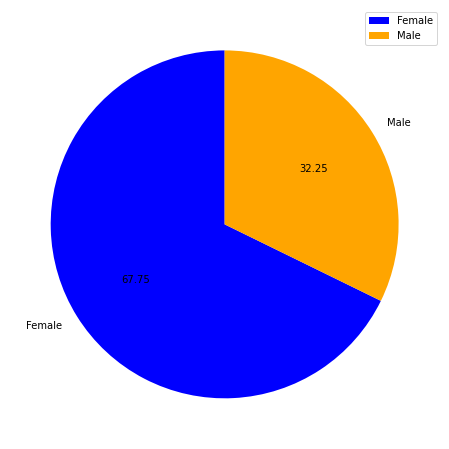

In [21]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['blue','orange'],
        autopct='%.2f'
       );
plt.legend();

Inference :
Female patients who has disease is greater than male patients.

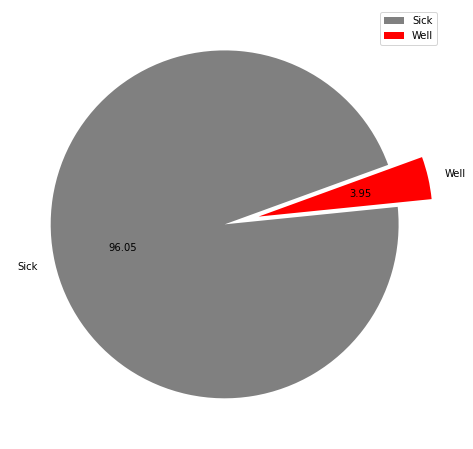

In [23]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['gray','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [24]:
X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label

Transform non-numerical labels to numerical labels.

In [25]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [26]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [27]:
# output1 = open('sex_lbl.pkl', 'wb')
# pickle.dump(s_encoder, output1)
# output1.close()
# output2 = open('surgery.pkl', 'wb')
# pickle.dump(th_encoder, output2)
# output2.close()

In [28]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [29]:
y = y.apply(func)

Split original data into training data and testing data.

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

Handle Imbalance Data

In [31]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [32]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


Scaling (Normalization)

In [33]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])

with open('scalar.pkl','wb') as f:
 #pickle.dump(scalr,f)

In [34]:
X_test.TT4 = scalr.transform(X_test[['TT4']])
X_test.age = scalr.transform(X_test[['age']])
X_test.FTI = scalr.transform(X_test[['FTI']])

Build Models.

In [39]:
models = {
    DecisionTreeClassifier() :'Decision Tree Classifier',
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Decision Tree Classifier is :  97.79005524861878 %
Accuracy Score for Logistic Regression is :  98.20441988950276 %
Accuracy Score for Support Vector Machine is :  98.20441988950276 %
Accuracy Score for Random Forest is :  98.89502762430939 %


**Inference :**

The most of patients who suffer from thyroid belonging to age group between 50-70

**Classification Report for each model.**

In [40]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Decision Tree Classifier
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.98      0.99      0.99       670

    accuracy                           0.98       724
   macro avg       0.95      0.89      0.91       724
weighted avg       0.98      0.98      0.98       724

----------------------------------------------------------
Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.99      0.99      0.99       670

    accuracy                           0.98       724
   macro avg       0.93      0.95      0.94       724
weighted avg       0.98      0.98      0.98       724

----------------------------------------------------------
Classificatio

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(x_smote,y_smote)
dtc.score(X_test,y_test)

0.9765193370165746

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_smote,y_smote)
lr.score(X_test,y_test)

0.9820441988950276

In [ ]:
svm = SVC()
svm.fit(x_smote,y_smote)
svm.score(X_test,y_test)

0.9820441988950276

In [43]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.9917127071823204

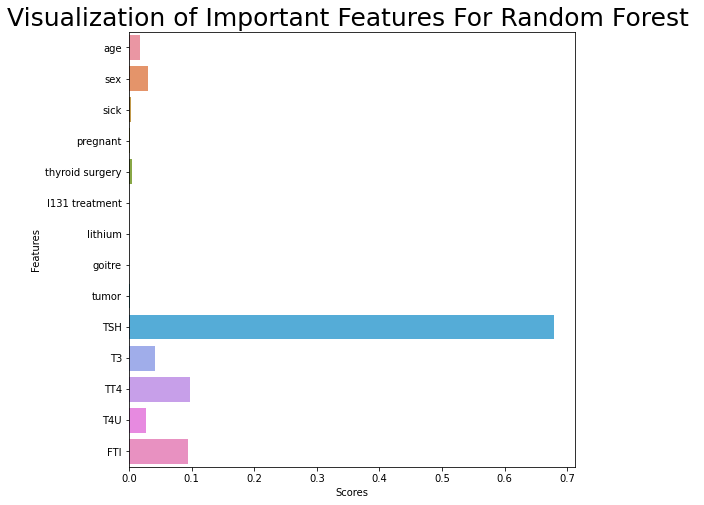

In [44]:
plt.figure(figsize=(8,8))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title("Visualization of Important Features For Random Forest ",{'fontsize':25})
plt.show();

In [45]:
x_smote.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)
X_test.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)

In [46]:
new_rf = RandomForestClassifier()
new_rf.fit(x_smote,y_smote)
new_rf.score(X_test,y_test)

0.9917127071823204

# with open('thyroid.pkl','wb') as f:
#     pickle.dump(new_rf,f)

In [47]:
thyroid_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


**Conclusion:**



Thyroid disease is one of the diseases that afflict the world’s population, and the number of cases of this disease is increasing. Because of medical reports that show serious imbalances in thyroid diseases, ourstudy deals with the classification of thyroid disease between hyperthyroidism and hypothyroidism. This disease was classified using algorithms. Machine learning showed us good results using several algorithmsand was built in the form of two models.